In [306]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np
import string

In [307]:
stock_returns = pd.read_csv("Data/refined_returns_new.csv")

print("Before conversion:")
print(f"Total rows: {len(stock_returns)}")
print(f"RET dtype: {stock_returns['RET'].dtype}")
print("Problem values in RET column:")
problem_mask = pd.to_numeric(stock_returns['RET'], errors='coerce').isna() & stock_returns['RET'].notna()
print(stock_returns[problem_mask]['RET'].value_counts())

# Convert RET column to numeric, replacing non-numeric values with NaN
stock_returns['RET'] = pd.to_numeric(stock_returns['RET'], errors='coerce')

# Drop rows with NaN values
stock_returns = stock_returns.dropna(how="any")

print(f"\nAfter conversion:")
print(f"RET dtype: {stock_returns['RET'].dtype}")
print(f"Remaining rows: {len(stock_returns)}")
print("First few RET values:")
print(stock_returns['RET'].head())

Before conversion:
Total rows: 1512
RET dtype: object
Problem values in RET column:
RET
C    2
Name: count, dtype: int64

After conversion:
RET dtype: float64
Remaining rows: 1508
First few RET values:
2   -0.006462
3    0.025172
4   -0.063943
5    0.004796
6    0.106820
Name: RET, dtype: float64


In [308]:
tickers = set(list(stock_returns["TICKER"]))
print(tickers)

{'XLP', 'XLK', 'XLE', 'XLRE', 'XLI', 'XLV', 'XLC', 'XLU', 'SPY', 'XLF', 'XLB', 'XLY'}


In [309]:
# Pivot the DataFrame to have tickers as columns and date as the index
stock_returns_pivoted = stock_returns.pivot(index='date', columns='TICKER', values='RET')


In [310]:
treasuries = pd.read_csv("Data/nikhilesh_treasury_2.csv")
treasuries = treasuries[(treasuries["caldt"]>="2014-01-31") & (treasuries["caldt"]<="2024-12-31")]
treasuries = treasuries.set_index("caldt")
treasuries = treasuries.rename_axis("date")
treasuries

,t30ret
date,
2014-01-31,0.000012
2014-02-28,0.000045
2014-03-31,0.000028
2014-04-30,0.000015
2014-05-30,0.000008
...,...
2024-08-30,0.004419
2024-09-30,0.004619
2024-10-31,0.003907


In [311]:
consolidated_data = pd.merge(stock_returns_pivoted,treasuries,left_index=True,right_index=True)
consolidated_data


,SPY,XLB,XLC,XLE,XLF,XLI,XLK,XLP,XLRE,XLU,XLV,XLY,t30ret
date,,,,,,,,,,,,,
2014-01-31,-0.035248,-0.047166,NaN,-0.057960,-0.036597,-0.042671,-0.025742,-0.051652,NaN,0.029760,0.009380,-0.060003,0.000012
2014-02-28,0.045516,0.069028,NaN,0.051211,0.030389,0.040576,0.043940,0.039009,NaN,0.034527,0.062187,0.063992,0.000045
2014-03-31,0.008291,0.008275,NaN,0.020959,0.033311,0.009498,0.004328,0.021874,NaN,0.033250,-0.012539,-0.028613,0.000028
2014-04-30,0.006952,0.008249,NaN,0.052549,-0.017010,0.013377,0.002751,0.027404,NaN,0.042209,-0.006326,-0.013597,0.000015
2014-05-30,0.023206,0.029578,NaN,0.016748,0.015027,0.019234,0.037586,0.018083,NaN,-0.010877,0.028734,0.028822,0.000008
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-30,0.023366,0.023226,0.017834,-0.020706,0.045725,0.028156,0.006993,0.059859,0.057295,0.048084,0.050591,-0.001973,0.004419
2024-09-30,0.020979,0.026712,0.038355,-0.030155,-0.005568,0.033554,0.026454,0.011259,0.032870,0.065926,-0.016557,0.072973,0.004619
2024-10-31,-0.008924,-0.031023,0.018142,0.008998,0.025596,-0.011887,-0.015592,-0.034699,-0.032908,-0.010770,-0.046423,-0.017368,0.003907


In [312]:
consolidated_data = consolidated_data.dropna(how='any')
consolidated_data

,SPY,XLB,XLC,XLE,XLF,XLI,XLK,XLP,XLRE,XLU,XLV,XLY,t30ret
date,,,,,,,,,,,,,
2018-07-31,0.037047,0.028586,-0.021603,0.015539,0.051147,0.073852,0.020872,0.039589,0.010394,0.015974,0.065540,0.018024,0.001558
2018-08-31,0.031920,-0.007701,0.014858,-0.034751,0.013596,0.002340,0.065990,0.003920,0.024206,0.012881,0.043292,0.051047,0.001575
2018-09-28,0.005968,-0.017736,-0.000982,0.024357,-0.021973,0.021840,-0.000207,0.010013,-0.026288,-0.006454,0.029501,0.005312,0.001490
2018-10-31,-0.069104,-0.091835,-0.060408,-0.113282,-0.047136,-0.108674,-0.080048,0.020026,-0.015946,0.019753,-0.067788,-0.101007,0.001890
2018-11-30,0.018549,0.038016,-0.022372,-0.015634,0.026256,0.038065,-0.019625,0.022723,0.054846,0.035388,0.080834,0.024768,0.001795
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-30,0.023366,0.023226,0.017834,-0.020706,0.045725,0.028156,0.006993,0.059859,0.057295,0.048084,0.050591,-0.001973,0.004419
2024-09-30,0.020979,0.026712,0.038355,-0.030155,-0.005568,0.033554,0.026454,0.011259,0.032870,0.065926,-0.016557,0.072973,0.004619
2024-10-31,-0.008924,-0.031023,0.018142,0.008998,0.025596,-0.011887,-0.015592,-0.034699,-0.032908,-0.010770,-0.046423,-0.017368,0.003907


In [313]:
sector_returns = ['XLC', 'XLE', 'XLF', 'XLI', 'XLK', 'XLP', 'XLRE', 'XLU', 'XLV', 'XLY']
stock_returns = sector_returns+['SPY']

for ticker in stock_returns:
    consolidated_data[ticker+' XR'] = consolidated_data[ticker]-consolidated_data['t30ret']

excess_returns_tickers = [sr+' XR' for sr in sector_returns]

consolidated_data

/var/folders/cf/zk37hd_50bv_nlrdlxrb4q3r0000gn/T/ipykernel_48578/2329552959.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  consolidated_data[ticker+' XR'] = consolidated_data[ticker]-consolidated_data['t30ret']
/var/folders/cf/zk37hd_50bv_nlrdlxrb4q3r0000gn/T/ipykernel_48578/2329552959.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  consolidated_data[ticker+' XR'] = consolidated_data[ticker]-consolidated_data['t30ret']
/var/folders/cf/zk37hd_50bv_nlrdlxrb4q3r0000gn/T/ipykernel_48578/2329552959.py:5

,SPY,XLB,XLC,XLE,XLF,XLI,XLK,XLP,XLRE,XLU,...,XLE XR,XLF XR,XLI XR,XLK XR,XLP XR,XLRE XR,XLU XR,XLV XR,XLY XR,SPY XR
date,,,,,,,,,,,,,,,,,,,,,
2018-07-31,0.037047,0.028586,-0.021603,0.015539,0.051147,0.073852,0.020872,0.039589,0.010394,0.015974,...,0.013981,0.049589,0.072294,0.019314,0.038031,0.008836,0.014416,0.063982,0.016466,0.035489
2018-08-31,0.031920,-0.007701,0.014858,-0.034751,0.013596,0.002340,0.065990,0.003920,0.024206,0.012881,...,-0.036326,0.012021,0.000765,0.064415,0.002345,0.022631,0.011306,0.041717,0.049472,0.030345
2018-09-28,0.005968,-0.017736,-0.000982,0.024357,-0.021973,0.021840,-0.000207,0.010013,-0.026288,-0.006454,...,0.022867,-0.023463,0.020350,-0.001697,0.008523,-0.027778,-0.007944,0.028011,0.003822,0.004478
2018-10-31,-0.069104,-0.091835,-0.060408,-0.113282,-0.047136,-0.108674,-0.080048,0.020026,-0.015946,0.019753,...,-0.115172,-0.049026,-0.110564,-0.081938,0.018136,-0.017836,0.017863,-0.069678,-0.102897,-0.070994
2018-11-30,0.018549,0.038016,-0.022372,-0.015634,0.026256,0.038065,-0.019625,0.022723,0.054846,0.035388,...,-0.017429,0.024461,0.036270,-0.021420,0.020928,0.053051,0.033593,0.079039,0.022973,0.016754
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-30,0.023366,0.023226,0.017834,-0.020706,0.045725,0.028156,0.006993,0.059859,0.057295,0.048084,...,-0.025125,0.041306,0.023737,0.002574,0.055440,0.052876,0.043665,0.046172,-0.006392,0.018947
2024-09-30,0.020979,0.026712,0.038355,-0.030155,-0.005568,0.033554,0.026454,0.011259,0.032870,0.065926,...,-0.034774,-0.010187,0.028935,0.021835,0.006640,0.028251,0.061307,-0.021176,0.068354,0.016360
2024-10-31,-0.008924,-0.031023,0.018142,0.008998,0.025596,-0.011887,-0.015592,-0.034699,-0.032908,-0.010770,...,0.005091,0.021689,-0.015794,-0.019499,-0.038606,-0.036815,-0.014677,-0.050330,-0.021275,-0.012831


In [314]:
print("XR ticksers", excess_returns_tickers)
saved_betas = {}
significant_alphas = {}
for er_ticker in excess_returns_tickers:
    X = consolidated_data['SPY XR']
    y = consolidated_data[er_ticker]
    mini_df = pd.DataFrame({"X":X, "y":y})
    mini_df = mini_df.dropna(how="any")
    X = mini_df['X']
    y = mini_df['y']

    X = sm.add_constant(X)
    model = sm.OLS(y, X).fit()
    print(model.summary())
    print(model.params)
    saved_betas[er_ticker] = model.params.iloc[1]
    alpha_pvalue = model.pvalues['const']
    
    if alpha_pvalue < 0.05:
        significant_alphas[er_ticker] = model.params['const']

    
    


XR ticksers ['XLC XR', 'XLE XR', 'XLF XR', 'XLI XR', 'XLK XR', 'XLP XR', 'XLRE XR', 'XLU XR', 'XLV XR', 'XLY XR']
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.785
Model:                            OLS   Adj. R-squared:                  0.782
Method:                 Least Squares   F-statistic:                     277.7
Date:                Sat, 20 Sep 2025   Prob (F-statistic):           4.31e-27
Time:                        11:01:38   Log-Likelihood:                 172.68
No. Observations:                  78   AIC:                            -341.4
Df Residuals:                      76   BIC:                            -336.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------

In [315]:
significant_alphas

{}

In [316]:

avg_xr = {}
means = []
for ert in excess_returns_tickers:
    mean = (consolidated_data[ert].mean())*12
    avg_xr[ert] = mean
    means.append(mean)

new_betas = [saved_betas[ert] for ert in excess_returns_tickers]

avg_xr = pd.DataFrame({"tickers":excess_returns_tickers,"avg_xr":means, "betas":new_betas})

avg_xr = avg_xr.set_index("tickers")

# Create mapping from ETF tickers to sector names
sector_mapping = {
    'XLC XR': 'Communication Services',
    'XLE XR': 'Energy', 
    'XLF XR': 'Financials',
    'XLI XR': 'Industrials',
    'XLK XR': 'Technology',
    'XLP XR': 'Consumer Staples',
    'XLRE XR': 'Real Estate',
    'XLU XR': 'Utilities',
    'XLV XR': 'Health Care',
    'XLY XR': 'Consumer Discretionary'
}

# Add sector names to the dataframe
avg_xr['sector'] = avg_xr.index.map(sector_mapping)
print("Updated avg_xr with sector names:")
avg_xr

Updated avg_xr with sector names:


,avg_xr,betas,sector
tickers,,,
XLC XR,0.109401,1.005228,Communication Services
XLE XR,0.100219,1.248007,Energy
XLF XR,0.113362,1.076093,Financials
XLI XR,0.111534,1.124416,Industrials
XLK XR,0.197090,1.126212,Technology
XLP XR,0.078238,0.595553,Consumer Staples
XLRE XR,0.063533,0.911036,Real Estate
XLU XR,0.080642,0.550332,Utilities
XLV XR,0.082643,0.705261,Health Care


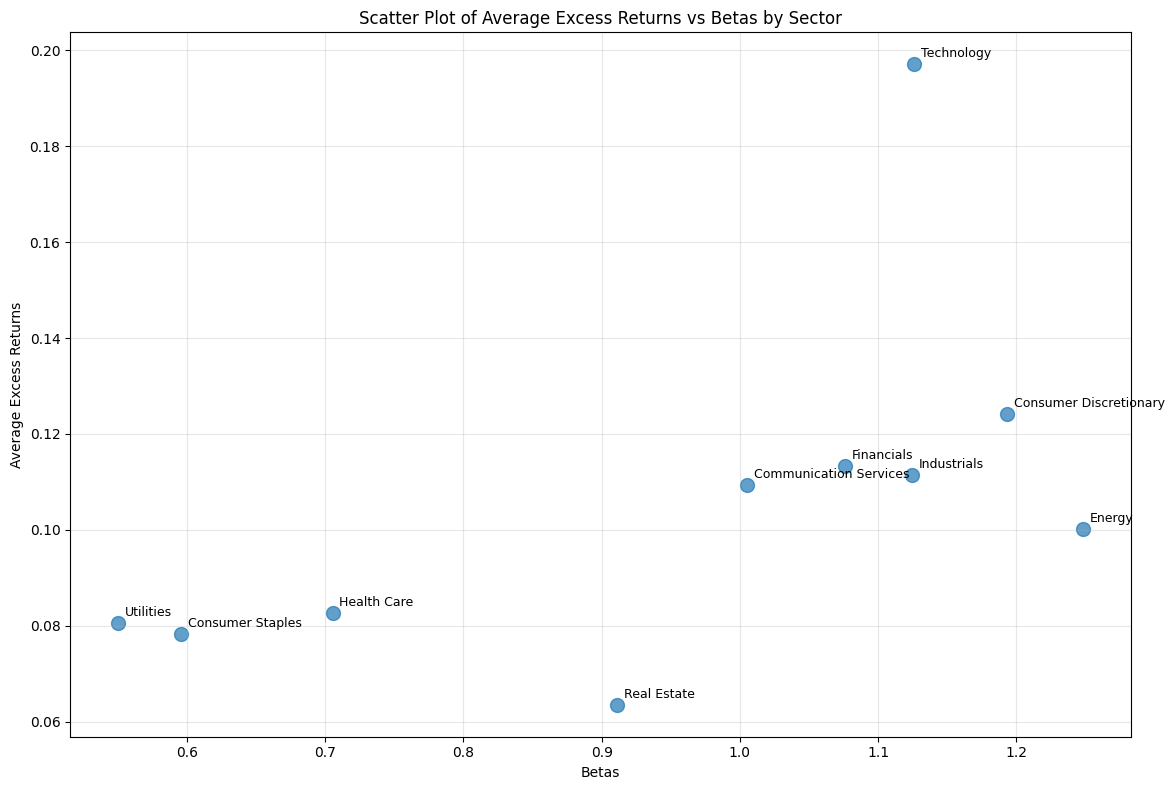

In [317]:
plt.figure(figsize=(12, 8))
plt.scatter(avg_xr['betas'], avg_xr['avg_xr'], s=100, alpha=0.7)

# Add labels for each point
for i, (idx, row) in enumerate(avg_xr.iterrows()):
    plt.annotate(row['sector'], 
                (row['betas'], row['avg_xr']),
                xytext=(5, 5), textcoords='offset points',
                fontsize=9, ha='left')

plt.xlabel('Betas')
plt.ylabel('Average Excess Returns')
plt.title('Scatter Plot of Average Excess Returns vs Betas by Sector')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


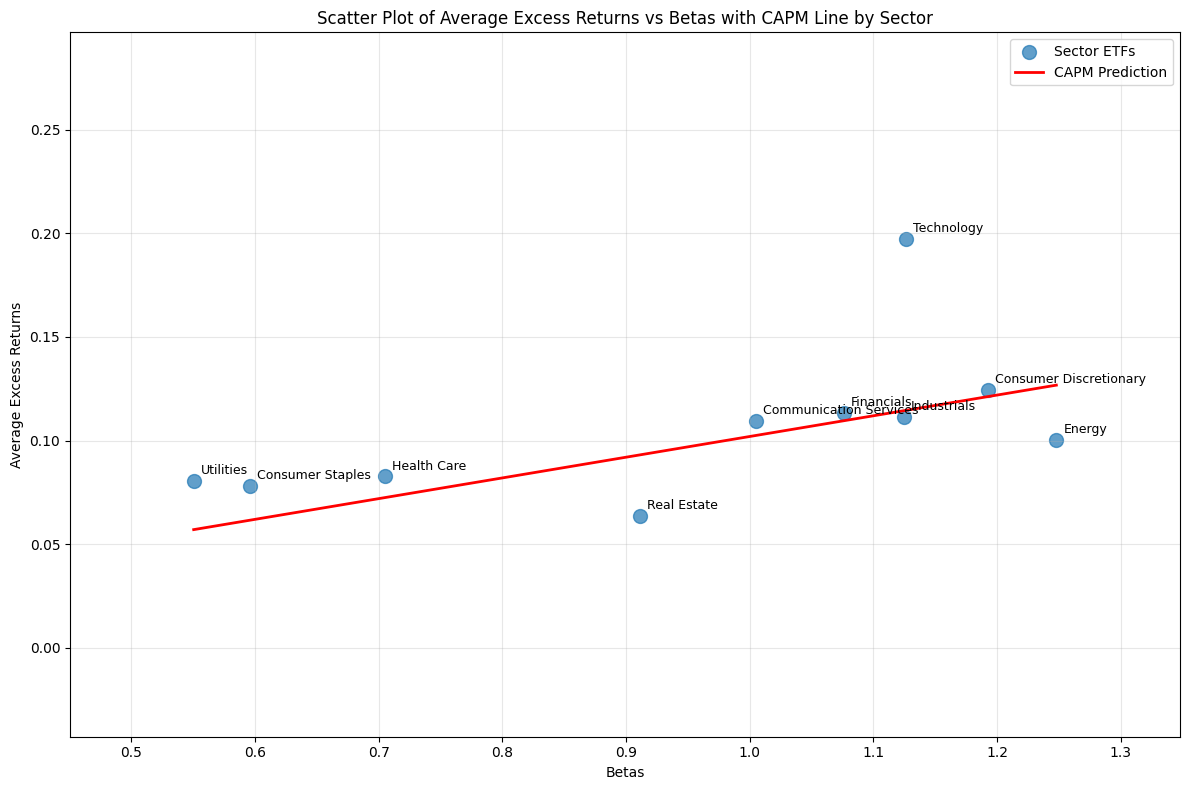

In [318]:
import numpy as np

risk_free_rate = consolidated_data['t30ret'].mean()

equity_premium = 0.10

x_values = np.array([avg_xr['betas'].min(), avg_xr['betas'].max()])
capm_line = risk_free_rate + equity_premium * x_values

plt.figure(figsize=(12, 8))
plt.scatter(avg_xr['betas'], avg_xr['avg_xr'], label='Sector ETFs', s=100, alpha=0.7)
plt.plot(x_values, capm_line, color='red', label='CAPM Prediction', linewidth=2)

# Add labels for each point
for i, (idx, row) in enumerate(avg_xr.iterrows()):
    plt.annotate(row['sector'], 
                (row['betas'], row['avg_xr']),
                xytext=(5, 5), textcoords='offset points',
                fontsize=9, ha='left')

plt.xlim(x_values.min() - 0.1, x_values.max() + 0.1)
plt.ylim(min(avg_xr['avg_xr'].min(), capm_line.min()) - 0.1, max(avg_xr['avg_xr'].max(), capm_line.max()) + 0.1)

plt.xlabel('Betas')
plt.ylabel('Average Excess Returns')
plt.title('Scatter Plot of Average Excess Returns vs Betas with CAPM Line by Sector')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

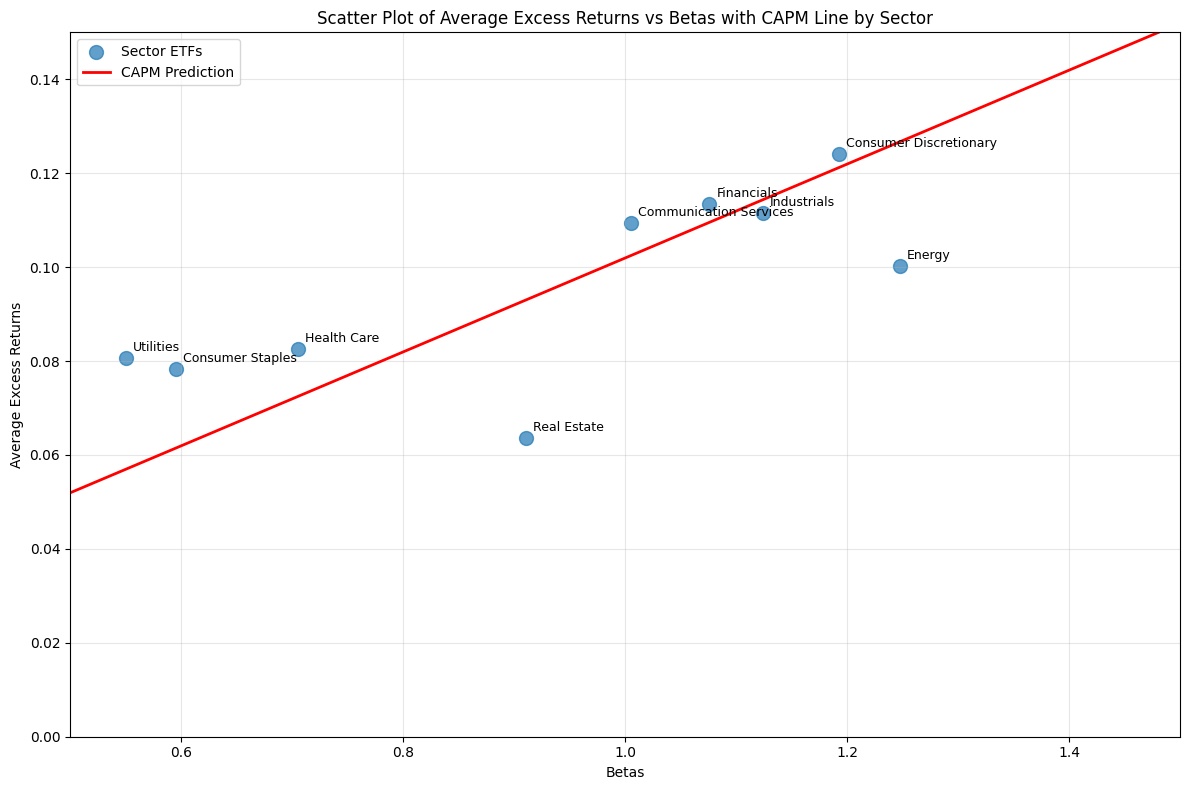

In [319]:
import numpy as np

risk_free_rate = consolidated_data['t30ret'].mean()
equity_premium = 0.10

x_values = np.array([0.5, 1.5])
capm_line = risk_free_rate + equity_premium * x_values


plt.figure(figsize=(12, 8))
plt.scatter(avg_xr['betas'], avg_xr['avg_xr'], label='Sector ETFs', s=100, alpha=0.7)
plt.plot(x_values, capm_line, color='red', linewidth=2, label='CAPM Prediction')

# Add labels for each point
for i, (idx, row) in enumerate(avg_xr.iterrows()):
    plt.annotate(row['sector'], 
                (row['betas'], row['avg_xr']),
                xytext=(5, 5), textcoords='offset points',
                fontsize=9, ha='left')

plt.xlim(0.5, 1.5)
plt.ylim(0, 0.15)

plt.xlabel('Betas')
plt.ylabel('Average Excess Returns')
plt.title('Scatter Plot of Average Excess Returns vs Betas with CAPM Line by Sector')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()
